In [791]:
import numpy as np
import matplotlib.pyplot as plt

#### Parameters

In [792]:
T=1
S0=100
Q0=0
r=0.3
sigma=0.1
K=105

### 1. Finite Difference Scheme

Time partition

In [793]:
#Time partition [0,T]
n=1000 #steps
delta_t=T/n
time=np.zeros(n+1)
for i in range (1,n+1):
    time[i]=time[i-1]+delta_t

#Space partition [-Z, Z]
Z=100
m=1000
delta_z=(2*Z)/m
space=np.zeros(m+1)
space[0]=-Z
for j in range (1,m+1):
    space[j]=space[j-1]+delta_z

#uniform spatial partition
d=delta_t/(delta_z*delta_z)

#Boundary conditions
A=np.zeros((n+1,m+1))

#the first and last column are 0, so we dont have to do anything
#the first row u(0,z)=z (first and last value=0)
for j in range (0,m+1):
    var=space[j]
    if var<0:
        var=0
    A[0][j]=var

for i in range(0,n+1):
    A[i][1000]=space[1000]

Solve with finite method

In [794]:
gamma=(1-np.exp(-r*time))/(r*T)

for i in range(1,n+1): #start at 1 and finish at n
    gamma_t=gamma[i] #the gamma given at each time
    for j in range(1,m): #start at m=1 and finish at m-1 (0 and m = boundary conditions)
        a=((sigma*sigma)/2)*((gamma_t-space[j])**2)
        b=d
        c=A[i-1,j+1]-2*A[i-1,j]+A[i-1,j-1]
        A[i][j]=A[i-1,j] + (a*b*c)

In [6]:
t=0
t_change=T-t
index_i=int(t_change/delta_t)

index_j=(((1/(r*T))*(1-np.exp(-r*(T-t_change)))) + 
         ((np.exp(-r*(T-t_change))/S0) * ((Q0/T)-K)))
index_j=int(index_j/delta_z)

In [17]:
call=S0*A[index_i,index_j]

100


### 2. Plots

Black-Scholes price

In [844]:
#function for computing Black Scholes price
from scipy import stats
def bs_price(T,S0,r,sigma,K):
    
    d1=np.log(S0/K) + (r+(sigma*sigma)/2)*T
    d1=d1/(sigma*np.sqrt(T))
    if (np.isinf(d1).any())==True:
        return -1
      #  return np.nan()

    d2=d1 - sigma*np.sqrt(T)

    vanilla_call=S0*stats.norm.cdf(d1)- K*np.exp(-r*T)*stats.norm.cdf(d2)
    vanilla_put=K*np.exp(-r*T)*stats.norm.cdf(-d2)-S0*stats.norm.cdf(-d1)
    return vanilla_call, vanilla_put

Accrued Monte Carlo

In [845]:
def simulate(T,S0,r,sigma,K):
    n=1000 #steps
    delta_t=T/n
    time=np.zeros(n+1)
    S=np.zeros(n+1)
    Q=np.zeros(n+1)
    for i in range (1,n+1):
        time[i]=time[i-1]+delta_t
    S[0]=S0
    Q[0]=0

    #simulate S and Q
    for i in range (1,n+1):
        W=np.random.normal(0,np.sqrt(delta_t))
        dS=(r*S[i-1]*delta_t)+(sigma*S[i-1]*W)
        dQ=S[i-1]*delta_t
        S[i]=S[i-1]+dS
        Q[i]=Q[i-1]+dQ
    return Q[-1]

In [846]:
T=1
S0=100
Q0=0
r=0.3
sigma=0.1
K=105

simulations=10000

In [847]:
def price(simulations,T,S0,r,sigma,K):
    payoffs_call=np.zeros(simulations)
    payoffs_put=np.zeros(simulations)
    for i in range(simulations):
        Q=simulate(T,S0,r,sigma,K)
        payoffs_call[i]=np.exp(-r*(T)) * max((Q/T)-K,0)
        payoffs_put[i]=np.exp(-r*(T)) * max(K-(Q/T),0)
    
    return np.mean(payoffs_call),np.mean(payoffs_put)

call,put= price(simulations,T,S0,r,sigma,K)
print(call,put)

8.6891944456092 0.06781230313667787


Volatility plots

In [777]:
T=1
S0=100
Q0=0
r=0.3
K=105

simulations=1000

In [778]:
volatility=np.arange(0.1,0.6,0.05)
asian_call=np.zeros(volatility.size)
asian_put=np.zeros(volatility.size)
european_call=np.zeros(volatility.size)
european_put=np.zeros(volatility.size)

i=0
for vol in volatility:
    asian_call[i],asian_put[i]=price(simulations,T,S0,r,vol,K)
    european_call[i], european_put[i]=bs_price(T,S0,r,vol,K)
    i+=1

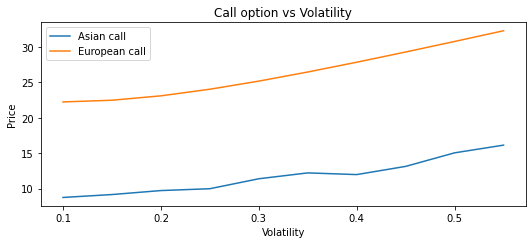

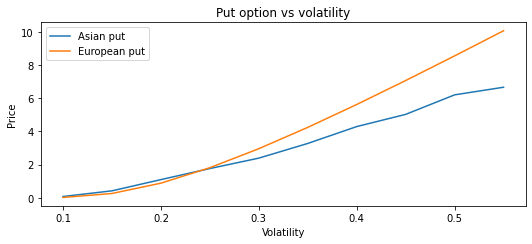

In [853]:
#Calls
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.title("Call option vs Volatility")
# plot lines 
plt.plot(volatility, asian_call, label = "Asian call") 
plt.plot(volatility, european_call, label = "European call") 
plt.xlabel("Volatility")
plt.ylabel("Price")
plt.legend() 
plt.savefig("Call-vol.png")           
plt.show()


#Puts
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.title("Put option vs volatility")
# plot lines 
plt.plot(volatility, asian_put, label = "Asian put") 
plt.plot(volatility, european_put, label = "European put") 
plt.xlabel("Volatility")
plt.ylabel("Price")
plt.legend() 
plt.savefig("Put-Vol.png")
plt.show()

Price plots

In [787]:
T=1
Q0=0
r=0.3
K=105
sigma=0.1

simulations=1000

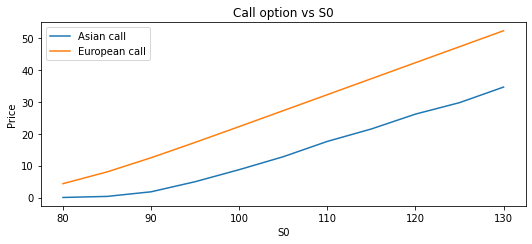

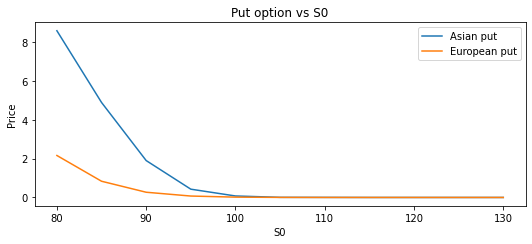

In [854]:
#Calls
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.title("Call option vs S0")
# plot lines 
plt.plot(price_p, asian_call_p, label = "Asian call") 
plt.plot(price_p, european_call_p, label = "European call") 
plt.legend() 
plt.xlabel("S0")
plt.ylabel("Price")
plt.savefig("Call-S0.png")
plt.show()


#Puts
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.title("Put option vs S0")
# plot lines 
plt.plot(price_p, asian_put_p, label = "Asian put") 
plt.plot(price_p, european_put_p, label = "European put") 
plt.legend() 
plt.xlabel("S0")
plt.ylabel("Price")
plt.savefig("Put-S0.png")
plt.show()

Call-put parity

In [786]:
T=1
S0=100
Q0=0
r=0.3
K=105

parity=0
for i in range(np.size(asian_call)):    
    a=asian_call[i]-asian_put[i]
    b=(Q0/T)*np.exp(-r*T) + (S0/(r*T))*(1-np.exp(-r*T)) - K*np.exp(-r*T)
    parity=parity+(a-b)

print(parity/np.size(asian_call))

0.022879996367332824


Control Variate

In [327]:
def simulate_cv(T,S0,r,sigma,K):
    n=1000 #steps
    delta_t=T/n
    time=np.zeros(n+1)
    S=np.zeros(n+1)
    Q=np.zeros(n+1)
    for i in range (1,n+1):
        time[i]=time[i-1]+delta_t
    S[0]=S0
    Q[0]=0

    #simulate S and Q
    for i in range (1,n+1):
        W=np.random.normal(0,np.sqrt(delta_t))
        dS=(r*S[i-1]*delta_t)+(sigma*S[i-1]*W)
        dQ=S[i-1]*delta_t
        S[i]=S[i-1]+dS
        Q[i]=Q[i-1]+dQ
    return Q[-1],S[-1] #use S as control variate

simulations=500
payoffs=np.zeros(simulations)
control_variate_S=np.zeros(simulations)
for i in range(simulations):
    Q,S=simulate_cv(T,S0,r,sigma,K)
    
    payoffs[i]=np.exp(-r*(T)) * max((Q/T)-K,0)
    control_variate_S[i]=S
    
c=np.cov(payoffs,control_variate_S)[0][0]/np.var(control_variate_S)
exp_S=S0*np.exp(r*T)

control_estimator=payoffs+c*(control_variate_S-exp_S)
    

print(np.mean(control_estimator))

8.31539747127638
